In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/")
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)

In [3]:
n_lim = 10**8
t_fin_lim = 2.0

In [4]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5,
    schema="quick",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=1.0,
    fo=1.0,
)
num_prop_quick_upwind = NumericalProperties(
    dx=3.9 * 10**-5,
    schema="quick upwind",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=1.0,
    fo=1.0,
)
num_prop_ref = NumericalProperties(
    dx=3.0 * 10**-5,
    schema="quick",
    time_scheme="rk4",
    phy_prop=phy_prop,
    cfl=1.0,
    fo=1.0,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.005)

# Test des différents opérateurs en QUICK pour la temperature

<IPython.core.display.Javascript object>


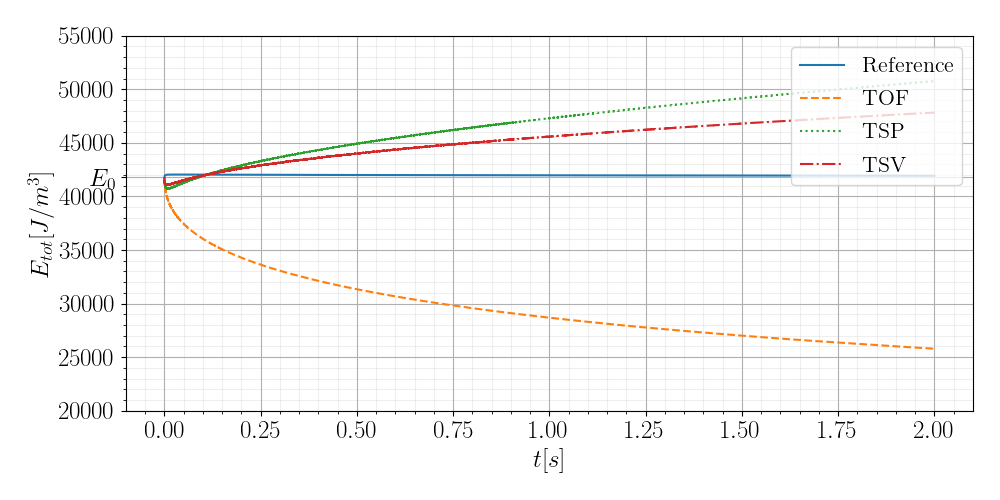

dt fourier
4.0888316389624144e-06
Db / dx = 4e+01
Reference


<IPython.core.display.Javascript object>


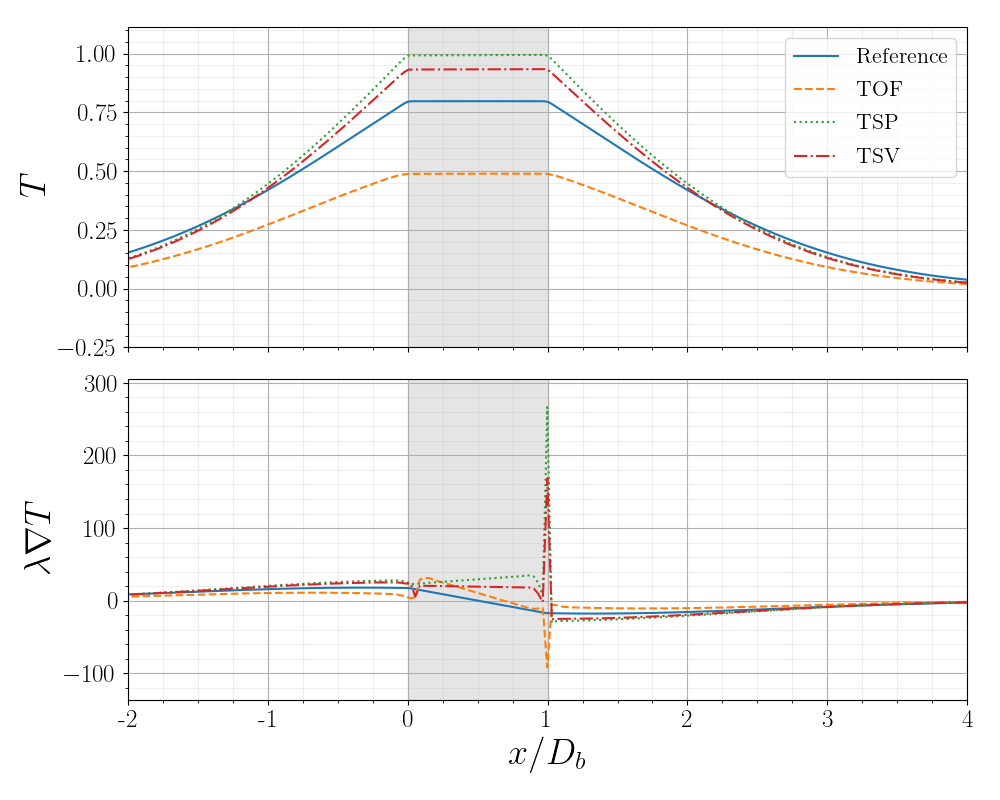

<IPython.core.display.Javascript object>


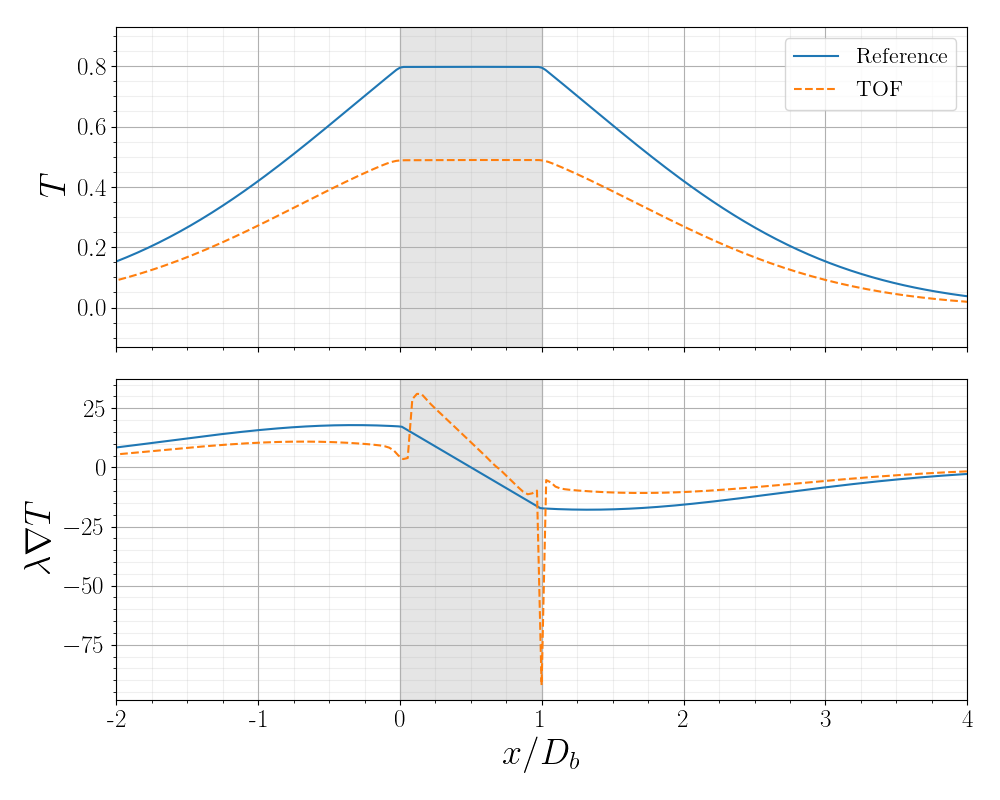

<IPython.core.display.Javascript object>


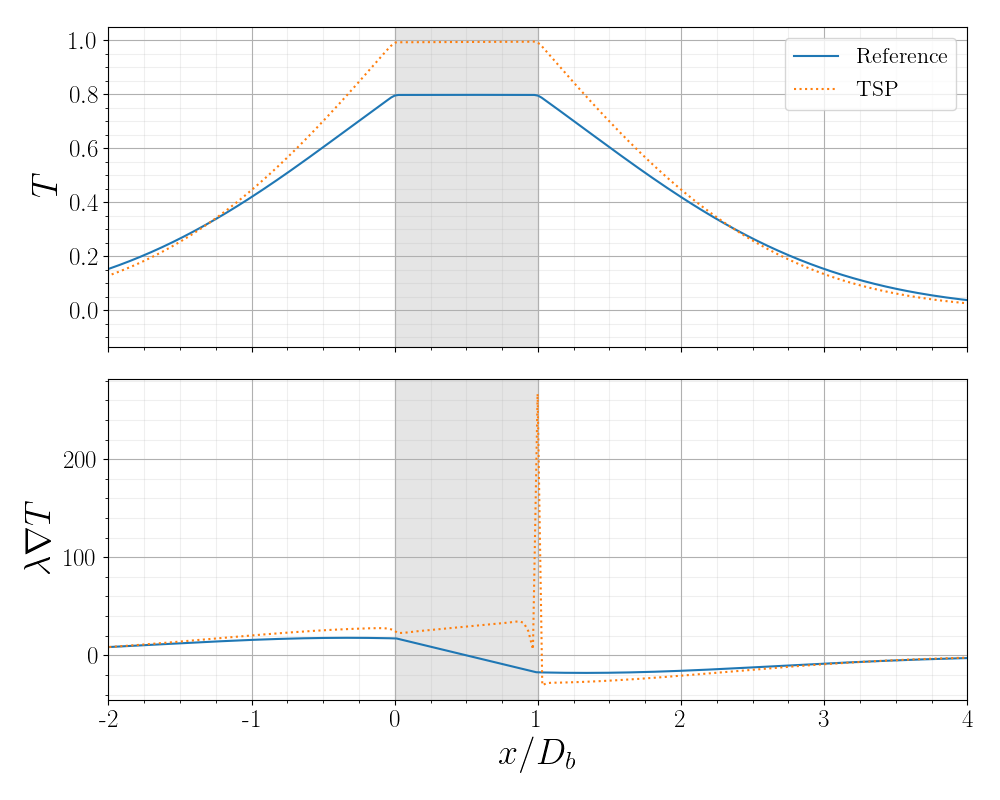

<IPython.core.display.Javascript object>


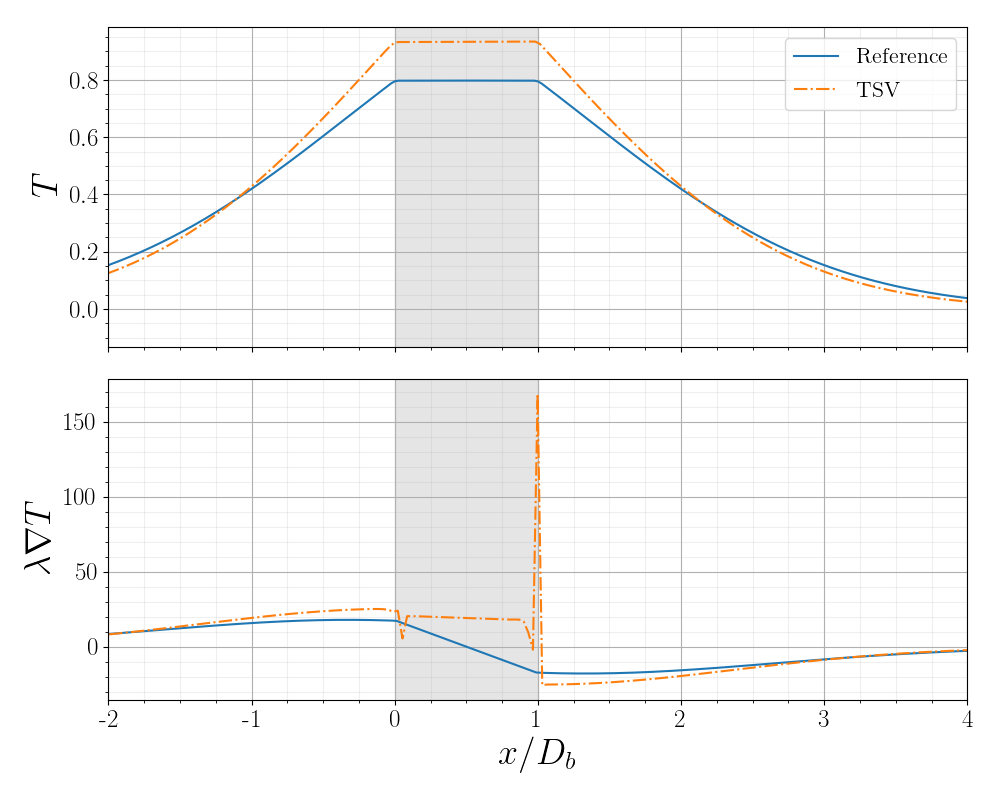

dE*/dt* ref = -4.47377e-09
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
TOF
dE*/dt* = -5.54223e-07
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
Ti
TSP
dE*/dt* = 6.14923e-07
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
Ti
TSV 
dE*/dt* = 4.00138e-07


In [5]:
t_fin = 2.0
plot = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot0 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot2 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot8 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
fig1, ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E_{tot} [J/m^3]$")

print("==========================")
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_ref,
    num_prop=num_prop_ref,
    name="Reference",
)
E1 = prob_ref.energy
# print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0, plot2, plot8],
    ls="-",
)
l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n / 5)
dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
print("dE*/dt* ref = %g" % dedt_adim)

print("==========================")
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
# print(prob0.name)
t, e = prob0.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0],
    ls="--",
)
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim_ref)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob0.name, ls="--")

print("==========================")
prob2 = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
    conv_interf="quick",
)
E0 = prob2.energy
# print(prob2.name)
t, e = prob2.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot2],
    ls=":",
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob2.name, ls=":")

# print('==========================')
# prob2amont = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='amont_centre')
# E0 = prob2amont.energy
# print(prob2amont.name+' amont')
# t, e = prob2amont.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2amont.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2amont.name+' amont')

print("==========================")
prob8 = ProblemDiscontinuSepIntT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
    conv_interf="quick",
)
E0 = prob8.energy
# print(prob8.name)
t, e = prob8.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot8],
    ls="-.",
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob8.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob8.name, ls="-.")

# print('==========================')
# prob8amont = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='amont_centre')
# E0 = prob8amont.energy
# print(prob8amont.name+ ' amont')
# t, e = prob8amont.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot8])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob8amont.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob8amont.name+' amont')

# for pl in [plot0, plot2, plot8]:
#     align_y_axis(pl.ax2, pl.ax3)

# Modif plot énergie

ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0 / (0.02 * 0.005**2))
labels.append(r"$E_0$")

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

# handles, labels = ax1.get_legend_handles_labels()
# labels[0] = 'TC, ' + labels[0]
# labels[1] = 'TC, ' + labels[1]
# ax1.legend(handles, labels)
ax1.legend()
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + "energie_synthese_form_temp_quick.pdf")

# Modif plot température

# handles, labels = plot.ax.get_legend_handles_labels()
# labels[0] = 'TC, ' + labels[0]
# labels[1] = 'TC, ' + labels[1]
# plot.ax.legend(handles, labels, loc='upper right')
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
# plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_euler_quick_form_temp.pdf")
#     plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_euler_quick.pdf')

# Comparaison des formulations en QUICK pour l'énergie

<IPython.core.display.Javascript object>


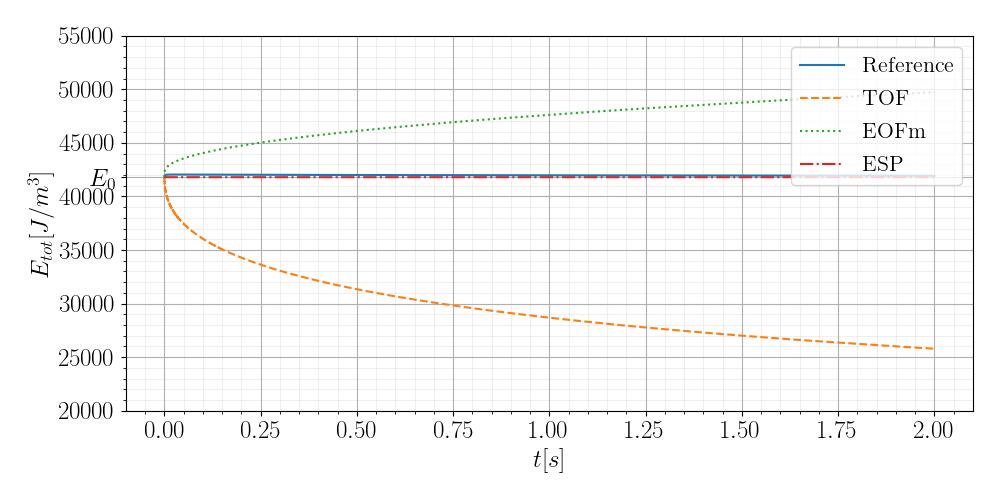

dt fourier
4.0888316389624144e-06
Db / dx = 4e+01
Reference


<IPython.core.display.Javascript object>


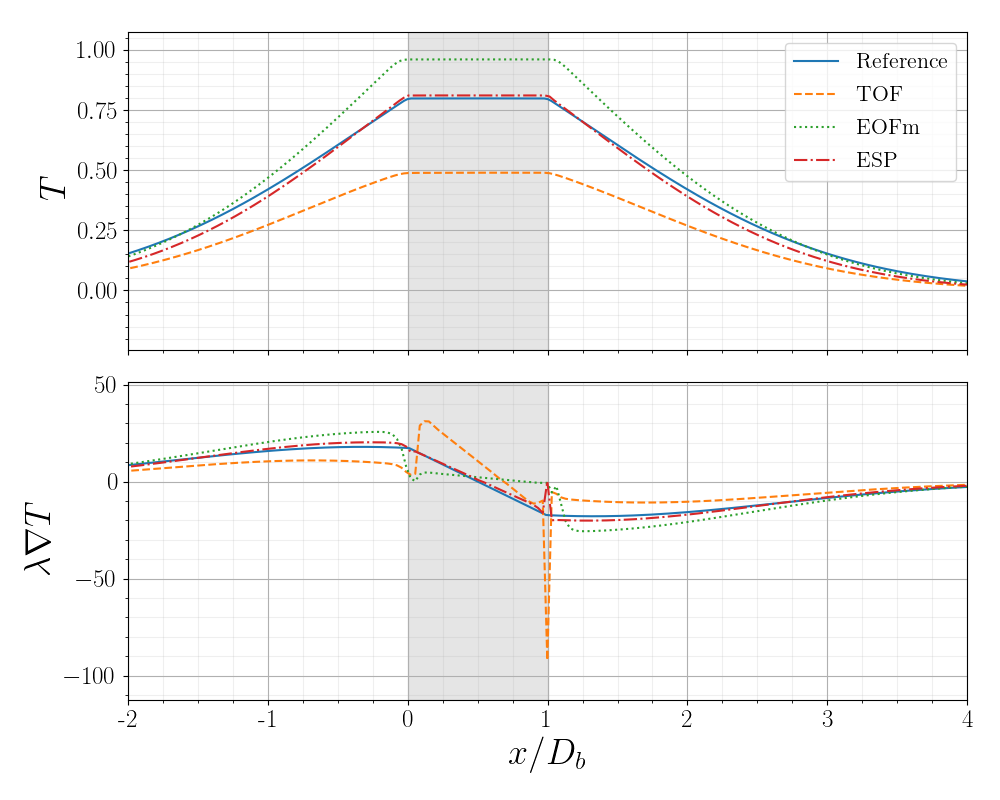

<IPython.core.display.Javascript object>


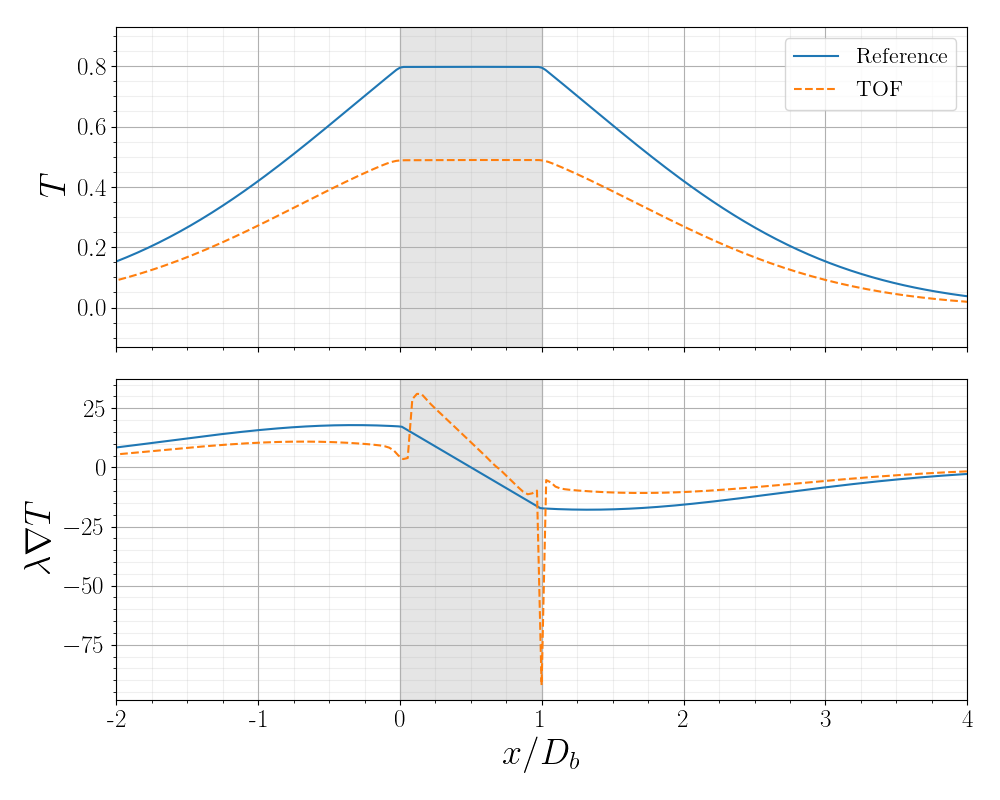

<IPython.core.display.Javascript object>


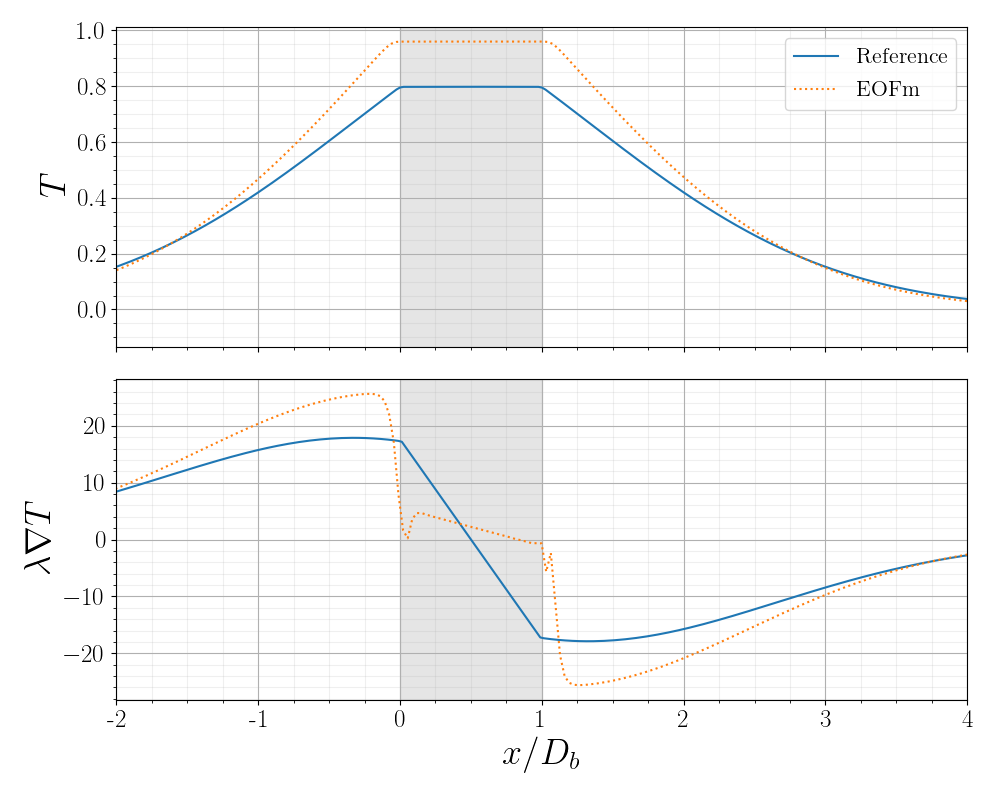

<IPython.core.display.Javascript object>


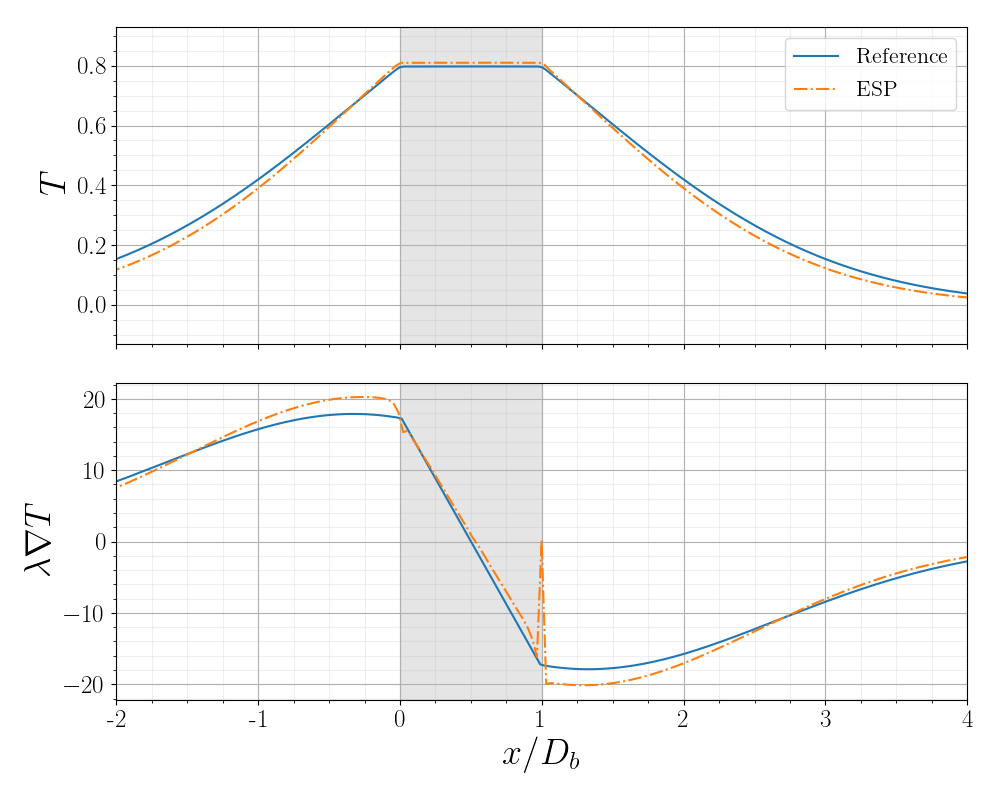

dE*/dt* ref = -4.47377e-09
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
TOF
dE*/dt* = -5.54223e-07
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
EOFm
dE*/dt* = 3.77878e-07
dt fourier
6.918433404737903e-06
Db / dx = 3e+01
Ti
ESP
dE*/dt* = 3.03851e-20


In [6]:
t_fin = 2.0
plot = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot0 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot1 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
plot4 = Plotter(
    "decale", lda_gradT=True, markers=False, time=False, zoom=(-2, 4), figsize=(10, 8)
)
# plot5 = Plotter('decale', lda_gradT=True, markers=False, time=False, zoom=(-2,4), figsize=(10,8))
# plot = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot0 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot1 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot4 = Plotter('classic', lda_gradT=True, figsize=(10,8))
# plot5 = Plotter('classic', lda_gradT=True, figsize=(10,8))
fig1, ax1 = plt.subplots(1)
# ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E_{tot} [J/m^3]$")

print("==========================")
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_ref,
    num_prop=num_prop_ref,
    name="Reference",
)
E1 = prob_ref.energy
# print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0, plot1, plot4],
)
l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n / 5)
dedt_adim_ref = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
print("dE*/dt* ref = %g" % dedt_adim_ref)

print("==========================")
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
# print(prob0.name)
t, e = prob0.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0],
    ls="--",
)
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim_ref)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob0.name, ls="--")

print("==========================")
prob0conserv = ProblemConserv2(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop_quick_upwind,
    name="EOFm",
)
E0 = prob0conserv.energy
# print(prob0conserv.name)
t, e = prob0conserv.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot1],
    ls=":",
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0conserv.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob0conserv.name, ls=":")

print("==========================")
prob4 = ProblemDiscontinuE(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
    conv_interf="quick",
    name="ESP",
)
E0 = prob4.energy
# print(prob4.name)
t, e = prob4.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot4],
    ls="-.",
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob4.name, ls="-.")

# print('==========================')
# prob4amont = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='amont_centre')
# E0 = prob4amont.energy
# print(prob4amont.name+' amont')
# t, e = prob4amont.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4amont.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4amont.name+' amont')

# Modif plot énergie

ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0 / (0.02 * 0.005**2))
labels.append(r"$E_0$")

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

# handles, labels = ax1.get_legend_handles_labels()
ax1.legend()
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + "energie_synthese_form_ener_quick.pdf")

# Modif plot température

# handles, labels = plot.ax.get_legend_handles_labels()
# labels[0] = 'Reference'
# plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
# plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_euler_quick_form_ener.pdf")
#     plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_euler_quick.pdf')